https://twitter.com/kimu3_slime/status/1608678692817080320?s=20&t=DN3hlMCpGLP6Q9HeHs8gaQ

による以下のグラフに関する指摘について:

https://gendai.media/articles/-/63904?page=3

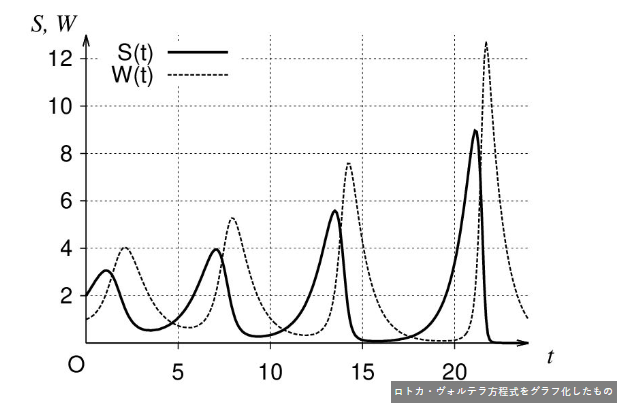

このグラフはどうも以下に引用する問題の解答例のグラフっぽい。

http://tomo-kumagai.eco.coocan.jp/2016_math_text_kenlo.pdf (pp.20-21)

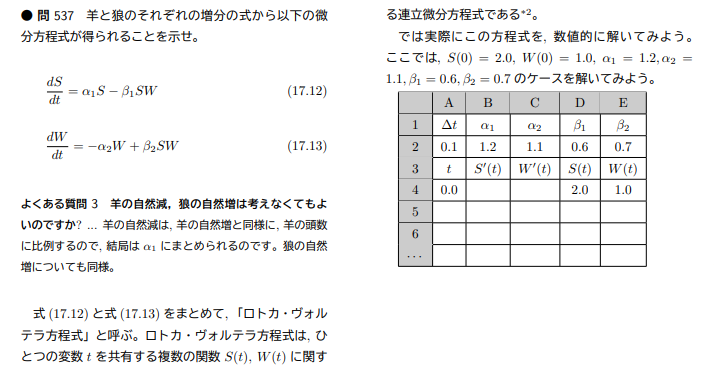

Lotka-Volterra方程式

$$
\frac{dS}{dt} = S(\alpha_1 - \beta_1 W), \quad
\frac{dW}{dt} = -W(\alpha_2 - \beta_2 S)
$$

が成立しているとき,

$$
H = \beta_2 S - \alpha_2\log S + \beta_1 W - \alpha_1\log W
$$

とおくと,

$$
\begin{aligned}
\frac{dH}{dt}
&= \left(\beta_2 - \frac{\alpha_2}{S}\right)\frac{dS}{dt}
+  \left(\beta_1 - \frac{\alpha_1}{W}\right)\frac{dW}{dt}
\\
&= \left(\beta_2 - \frac{\alpha_2}{S}\right)S(\alpha_1 - \beta_1 W)
-  \left(\beta_1 - \frac{\alpha_1}{W}\right)W(\alpha_2 - \beta_2 S)
\\
&= \left(\beta_2 S - \alpha_2\right)(\alpha_1 - \beta_1 W)
-  \left(\beta_1 W - \alpha_1\right)(\alpha_2 - \beta_2 S)
= 0.
\end{aligned}
$$

すなわち $H$ はLotka-Volterra方程式の保存料になる.

In [1]:
# See http://tomo-kumagai.eco.coocan.jp/2016_math_text_kenlo.pdf, pp.20-21

using OrdinaryDiffEq
using StaticArrays
using Plots
default(fmt=:png, titlefontsize=12)

function LotkaVolterra(u, param, t)
    S, W = u
    (; α₁, α₂, β₁, β₂) = param
    dS =  α₁*S - β₁*S*W
    dW = -α₂*W + β₂*S*W
    SVector(dS, dW)
end

function H(u, param)
    S, W = u
    (; α₁, α₂, β₁, β₂) = param
    β₂*S - α₂*log(S) + β₁*W - α₁*log(W)
end

param = (α₁=1.2, α₂=1.1, β₁=0.6, β₂=0.7)
S0, W0 = 2.0, 1.0
u0 = SVector(S0, W0)
tspan = (0, 25)
prob = ODEProblem(LotkaVolterra, u0, tspan, param)

ODEProblem with uType SVector{2, Float64} and tType Int64. In-place: false
timespan: (0, 25)
u0: 2-element SVector{2, Float64} with indices SOneTo(2):
 2.0
 1.0

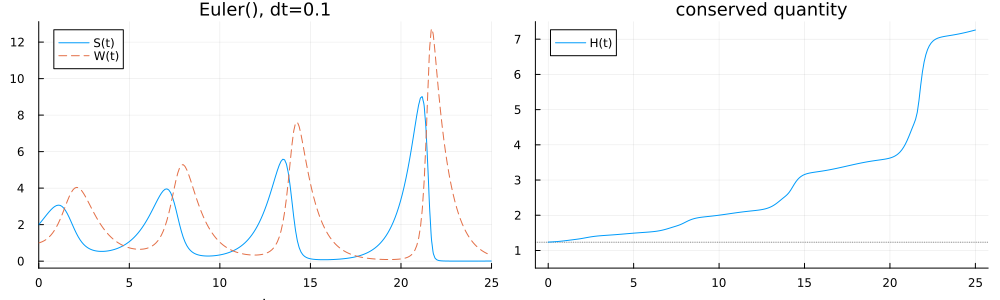

In [2]:
dt = 0.1
sol = solve(prob, Euler(); dt)
P1 = plot(sol; label=["S(t)" "W(t)"], ls=[:solid :dash], title="Euler(), dt=$dt")
P2 = hline([H(u0, param)]; label="", ls=:dot, lw=0.5, c=:black)
plot!(sol.t, H.(sol.u, Ref(param)); label="H(t)", ylim=(0.5, 7.5), c=1)
title!("conserved quantity")
plot!(P1, P2; size=(1000, 300))

このグラフと件の次のグラフが一致しているように見える.

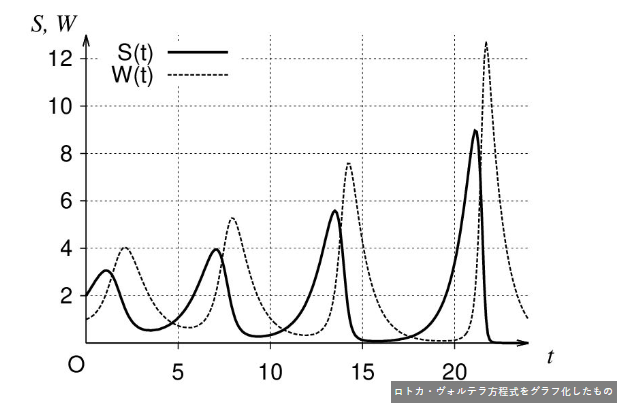

以下は時間の刻み幅を小さくした場合.

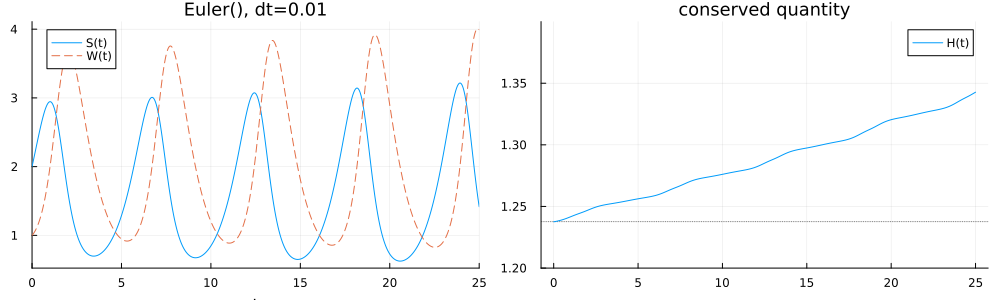

In [3]:
dt = 0.01
sol = solve(prob, Euler(); dt)
P1 = plot(sol; label=["S(t)" "W(t)"], ls=[:solid :dash], title="Euler(), dt=$dt")
P2 = hline([H(u0, param)]; label="", ls=:dot, lw=0.5, c=:black)
plot!(sol.t, H.(sol.u, Ref(param)); label="H(t)", ylim=(1.2, 1.4), c=1)
title!("conserved quantity")
plot!(P1, P2; size=(1000, 300))

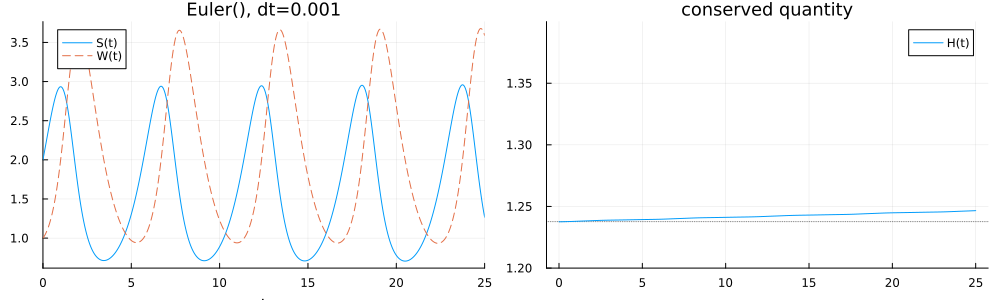

In [4]:
dt = 0.001
sol = solve(prob, Euler(); dt)
P1 = plot(sol; label=["S(t)" "W(t)"], ls=[:solid :dash], title="Euler(), dt=$dt")
P2 = hline([H(u0, param)]; label="", ls=:dot, lw=0.5, c=:black)
plot!(sol.t, H.(sol.u, Ref(param)); label="H(t)", ylim=(1.2, 1.4), c=1)
title!("conserved quantity")
plot!(P1, P2; size=(1000, 300))

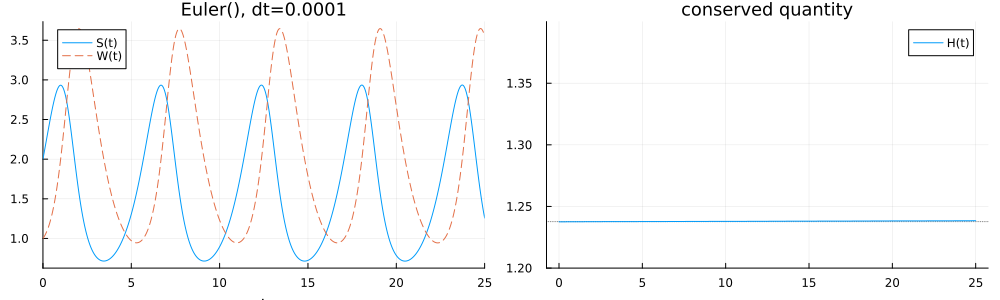

In [5]:
dt = 0.0001
sol = solve(prob, Euler(); dt)
P1 = plot(sol; label=["S(t)" "W(t)"], ls=[:solid :dash], title="Euler(), dt=$dt")
P2 = hline([H(u0, param)]; label="", ls=:dot, lw=0.5, c=:black)
plot!(sol.t, H.(sol.u, Ref(param)); label="H(t)", ylim=(1.2, 1.4), c=1)
title!("conserved quantity")
plot!(P1, P2; size=(1000, 300))

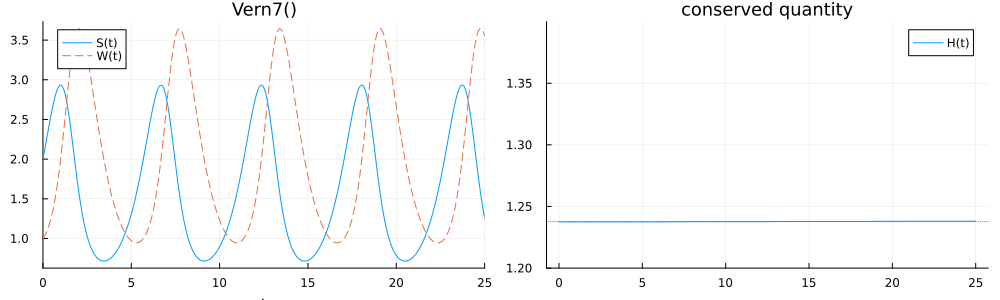

In [6]:
sol = solve(prob, Vern7())
P1 = plot(sol; label=["S(t)" "W(t)"], ls=[:solid :dash], title="Vern7()")
P2 = hline([H(u0, param)]; label="", ls=:dot, lw=0.5, c=:black)
plot!(sol.t, H.(sol.u, Ref(param)); label="H(t)", ylim=(1.2, 1.4), c=1)
title!("conserved quantity")
plot!(P1, P2; size=(1000, 300))

---
以下は古いバージョン

In [7]:
using OrdinaryDiffEq
using StaticArrays
using Plots
default(fmt=:png, titlefontsize=12)

function LotkaVolterra_old(u, param, t)
    S, W = u
    p, q, r, s = param
    dS =  p*S - q*W*S
    dW = -r*W + s*W*S
    SVector(dS, dW)
end

param = [1.4, 0.7, 1.0, 1.0]
u0 = SVector(2.0, 1.0)
tspan = (0, 25)
prob_old = ODEProblem(LotkaVolterra_old, u0, tspan, param)

ODEProblem with uType SVector{2, Float64} and tType Int64. In-place: false
timespan: (0, 25)
u0: 2-element SVector{2, Float64} with indices SOneTo(2):
 2.0
 1.0

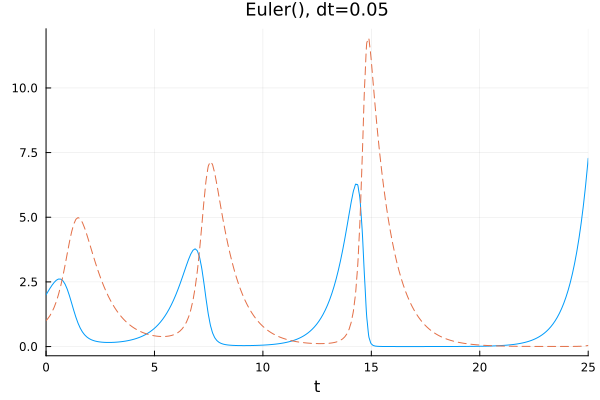

In [8]:
sol = solve(prob_old, Euler(); dt=0.1)
plot(sol; legend=false, ls=[:solid :dash], title="Euler(), dt=0.05")

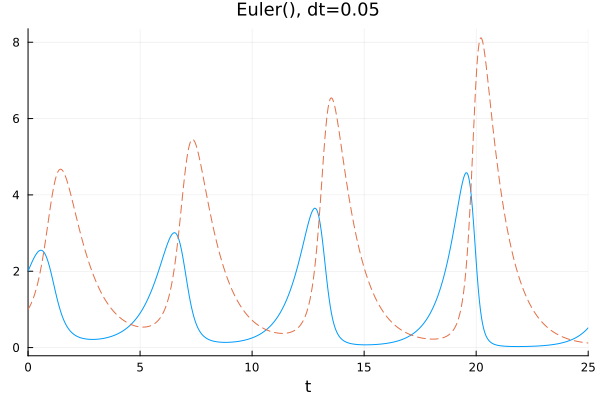

In [9]:
sol = solve(prob_old, Euler(); dt=0.05)
plot(sol; legend=false, ls=[:solid :dash], title="Euler(), dt=0.05")

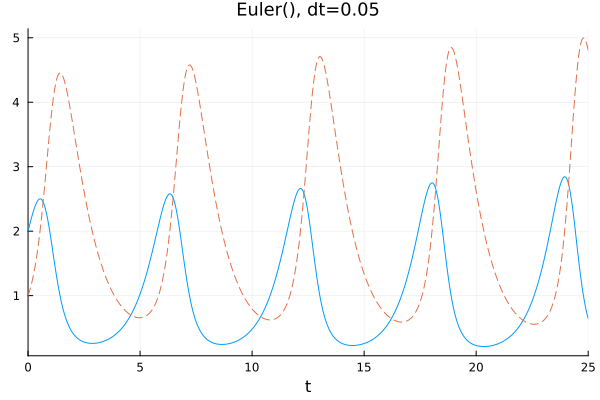

In [10]:
sol = solve(prob_old, Euler(); dt=0.01)
plot(sol; legend=false, ls=[:solid :dash], title="Euler(), dt=0.05")

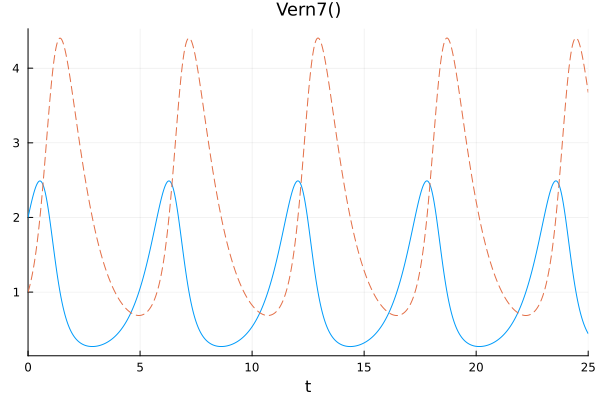

In [11]:
sol = solve(prob_old, Vern7())
plot(sol; legend=false, ls=[:solid :dash], title="Vern7()")